# Fresnel Diffraction Approximation Simulator

In [70]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.fft import *
from PIL import Image
from pylab import *
from matplotlib.widgets import Slider

img = Image.open('doubleslitthin.png').convert('L')

In [71]:
# units
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

I recommend that aperture size and plane size are the same units at the least. If they are too different, the aperture generator won't resize correctly.

In [95]:
wavelength = 632 * nm
sensitivity = 1
z = 0.5

# Fresnel Number; aperture dimensions must be less than or equal to this
f = np.sqrt((np.pi)*(z*wavelength))

unit = mm

# Aperture plane
width = 10 * unit
height = 10 * unit

# Aperture size
width_a = 1 * unit
height_a = 1 * unit

sizefactor = width/width_a, height/height_a

dx = 2000
dy = 2000

print(sizefactor)

print(f)

(10.0, 10.0)
0.0009963650327738196


In [107]:
# Capitals define the screen plane with the center being 0, total lengths x and y
x = (width/dx)*(np.arange(dx)-dx//2) 
y = (height/dy)*(np.arange(dy)-dy//2)
X, Y = np.meshgrid(x, y)

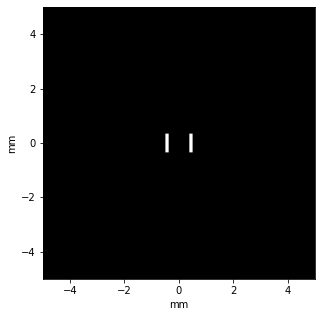

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
# Create a black background image with specified dimensions
img_back = Image.new('L', (dx,dy), 'black')

# Resize aperture image to adjusted dimensions based on the ratio of aperture plane to aperture size
img_size = (int(dx/sizefactor[0]), int(dy/sizefactor[0]))
resized = img.resize(img_size)

# Impose aperture picture to black background in the center
img_back.paste(resized, ((dx-img_size[0])//2, (dy-img_size[1])//2))

# Convert image to a numpy array (same shape as dimension specified)
img_arr = np.asarray(img_back)

img_arr = np.where(img_arr > 0, 1, 0)
        
# Plot the aperture with correct units
extent_a = [-width/(unit*2), width/(unit*2), -height/(unit*2), height/(unit*2)]

plt.figure(figsize=(5,5))
plt.imshow(img_arr, cmap="gray", extent=extent_a)

if unit == cm:
    plt.xlabel('cm')
    plt.ylabel('cm')
elif unit == mm:
    plt.xlabel('mm')
    plt.ylabel('mm')
elif unit == um:
    plt.xlabel('μm')
    plt.ylabel('μm')
elif unit == nm:
    plt.xlabel('nm')
    plt.ylabel('nm')

plt.show()

# Create light field from the set intensity (E0) and the image array
# Idea is E * aperture = E transmitted
E = img_arr

In [109]:
def I(width, height, dx, dy, wavelength, E, X, Y, z):
    # Obtain the spatial frequencies of the FT
    wx = fftshift(fftfreq(dx, (width/dx)))
    wy = fftshift(fftfreq(dy, (width/dy)))

    # Intensity using Fresnel Diffraction Integral, which is the FT part without the proportionality constant
    return np.abs(fftshift(fft2(E * np.exp((1j * np.pi)/(wavelength*z) *(X**2 + Y**2)))))

I = I(width, height, dx, dy, wavelength, E, X, Y, z)

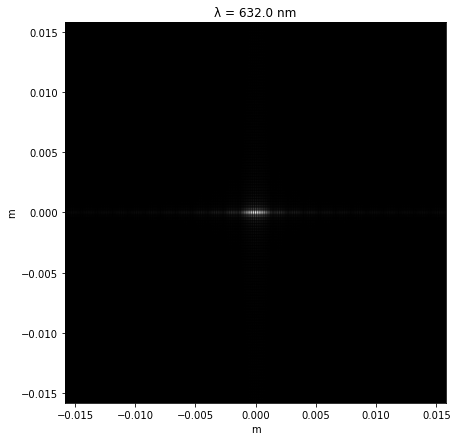

In [112]:
# Dimensions of the screen
dxscreen = z*wavelength/(2*width)
dyscreen = z*wavelength/(2*height)
xscreen = dxscreen * (np.arange(dx)-dx//2)
yscreen = dyscreen * (np.arange(dy)-dy//2)

ex = [xscreen[0], xscreen[-1], yscreen[0], yscreen[-1]]

plt.figure(figsize=(7,7))
plt.imshow(I, cmap='gray', interpolation="spline36", extent = ex, origin = "lower", vmax=np.max(I)*sensitivity)
plt.xlabel('m')
plt.ylabel('m')
plt.title('λ = {} nm'.format(wavelength/nm))
plt.show()